In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import pylab 
import scipy.stats as stats

 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score


import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/rashida048/Datasets/master/home_data.csv')

In [3]:
df.head()

id             date   price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900         3       1.00         1180   
1  6414100192  20141209T000000  538000         3       2.25         2570   
2  5631500400  20150225T000000  180000         2       1.00          770   
3  2487200875  20141209T000000  604000         4       3.00         1960   
4  1954400510  20150218T000000  510000         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

## EDA

In [4]:
print(f'El tamaño del dataset es: {df.shape}')

El tamaño del dataset es: (21613, 21)


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# Tipos de datos y cantidad de valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
# Calcula estadísticas básicas para las columnas numéricas
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [8]:
variables_numericas = ["price","sqft_living","sqft_lot","sqft_above","sqft_basement","lat","long","sqft_living15","sqft_lot15"]
variables_categoricas = ["bedrooms","bathrooms","floors","waterfront","view","condition","grade","yr_built","yr_renovated","zipcode"]

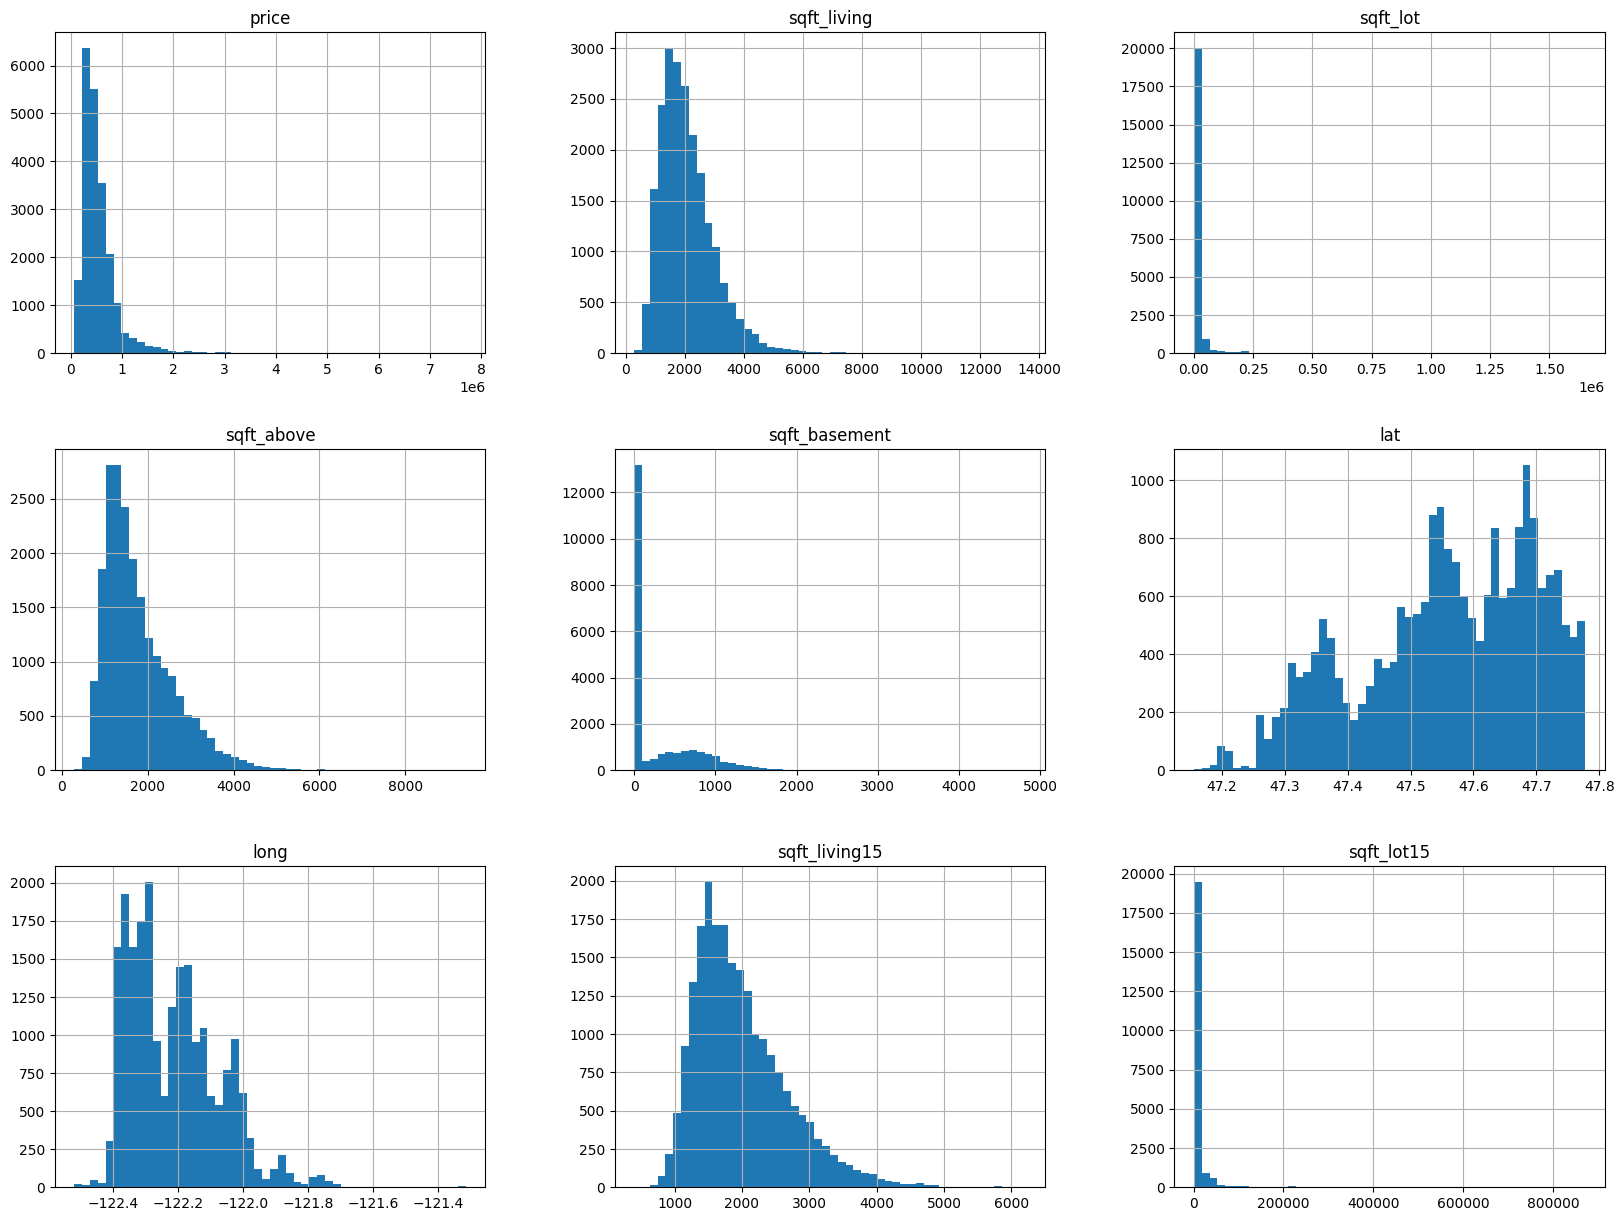

In [11]:
df[variables_numericas].hist(bins=50, figsize=(20, 15));

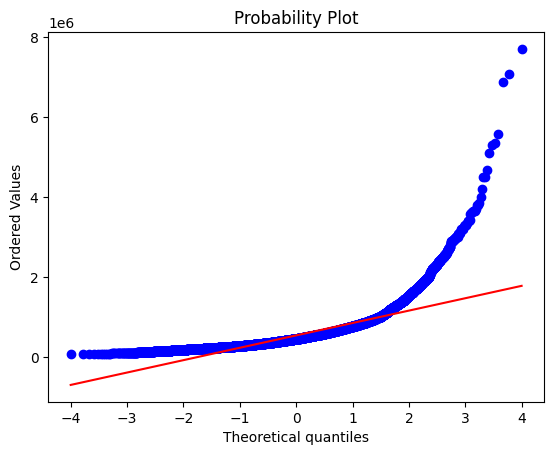

In [12]:
stats.probplot(df['price'], dist="norm", plot=pylab)
pylab.show()

Se puede observar que las variables que tienen que ver con pies cuadrados del inmueble tienden a tener una asimetría positiva y una curtosis positiva. Lo que nos indica que la mayoría de los inmubeles que estamos anilizando no son de gran tamaño, pero sin embargo contamos en nuestro dataset con tamaños grandes en su cola derecha de las graficas, lo cual si vamos a revisar la grafica de precios, puede tener una relación, dado que presentan la misma forma.
Por lo tanto empezamos a sospechar presencia de outliers fuertes, por lo que graficamos un qq-plot de los precios y vemos que la asimetría se debia a unos datos de precicos muy elevados en nuestro dataset, esto lo trataremos en el pre-procesamiento.

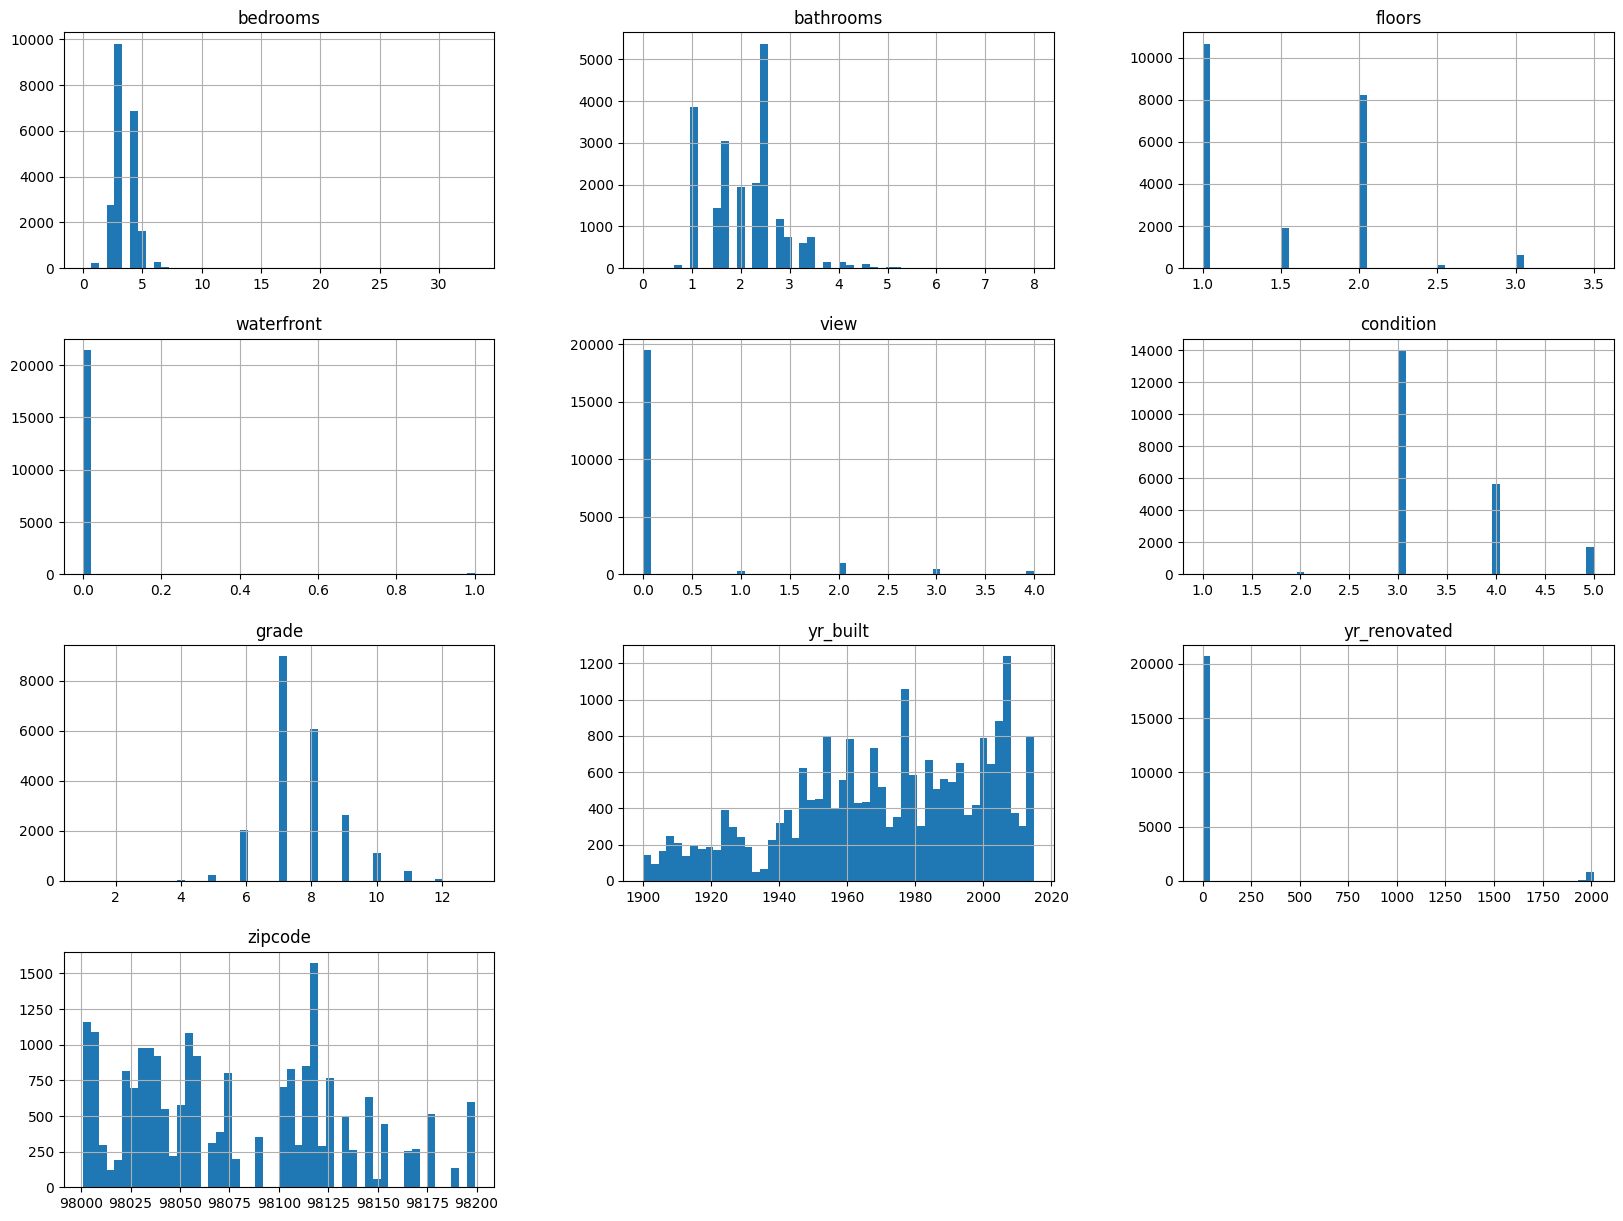

In [11]:
df[variables_categoricas].hist(bins=50, figsize=(20, 15));

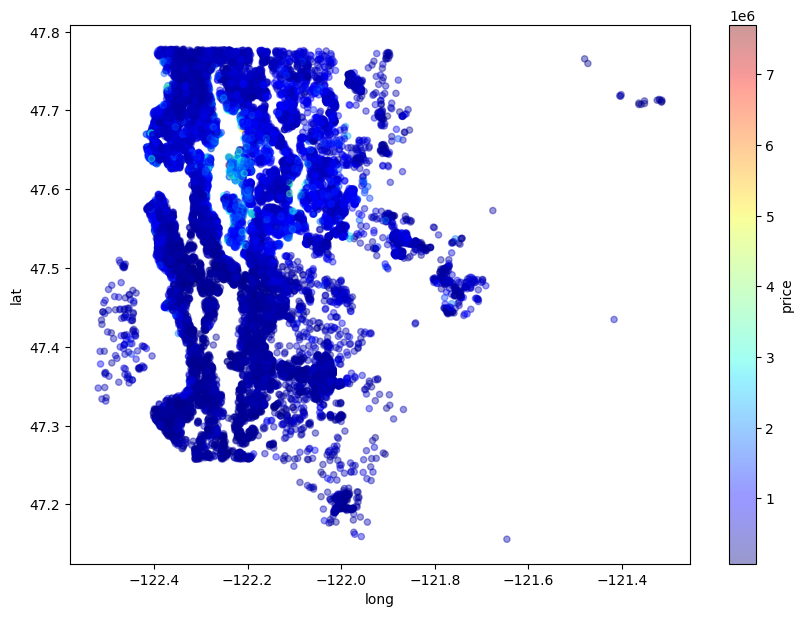

In [22]:
df.plot(
    kind="scatter",
    x="long",
    y="lat",
    alpha=0.4,
    figsize=(10, 7),
    c="price",
    cmap=plt.get_cmap("jet"),
    colorbar=True,
    sharex=False,
);

Aquí podemos observar como en la parte central de los datos se ve un cambio de color en cuanto a los precios, lo que nos podría indicar que en esta zona se pueden encontrar viviendas mas costosas

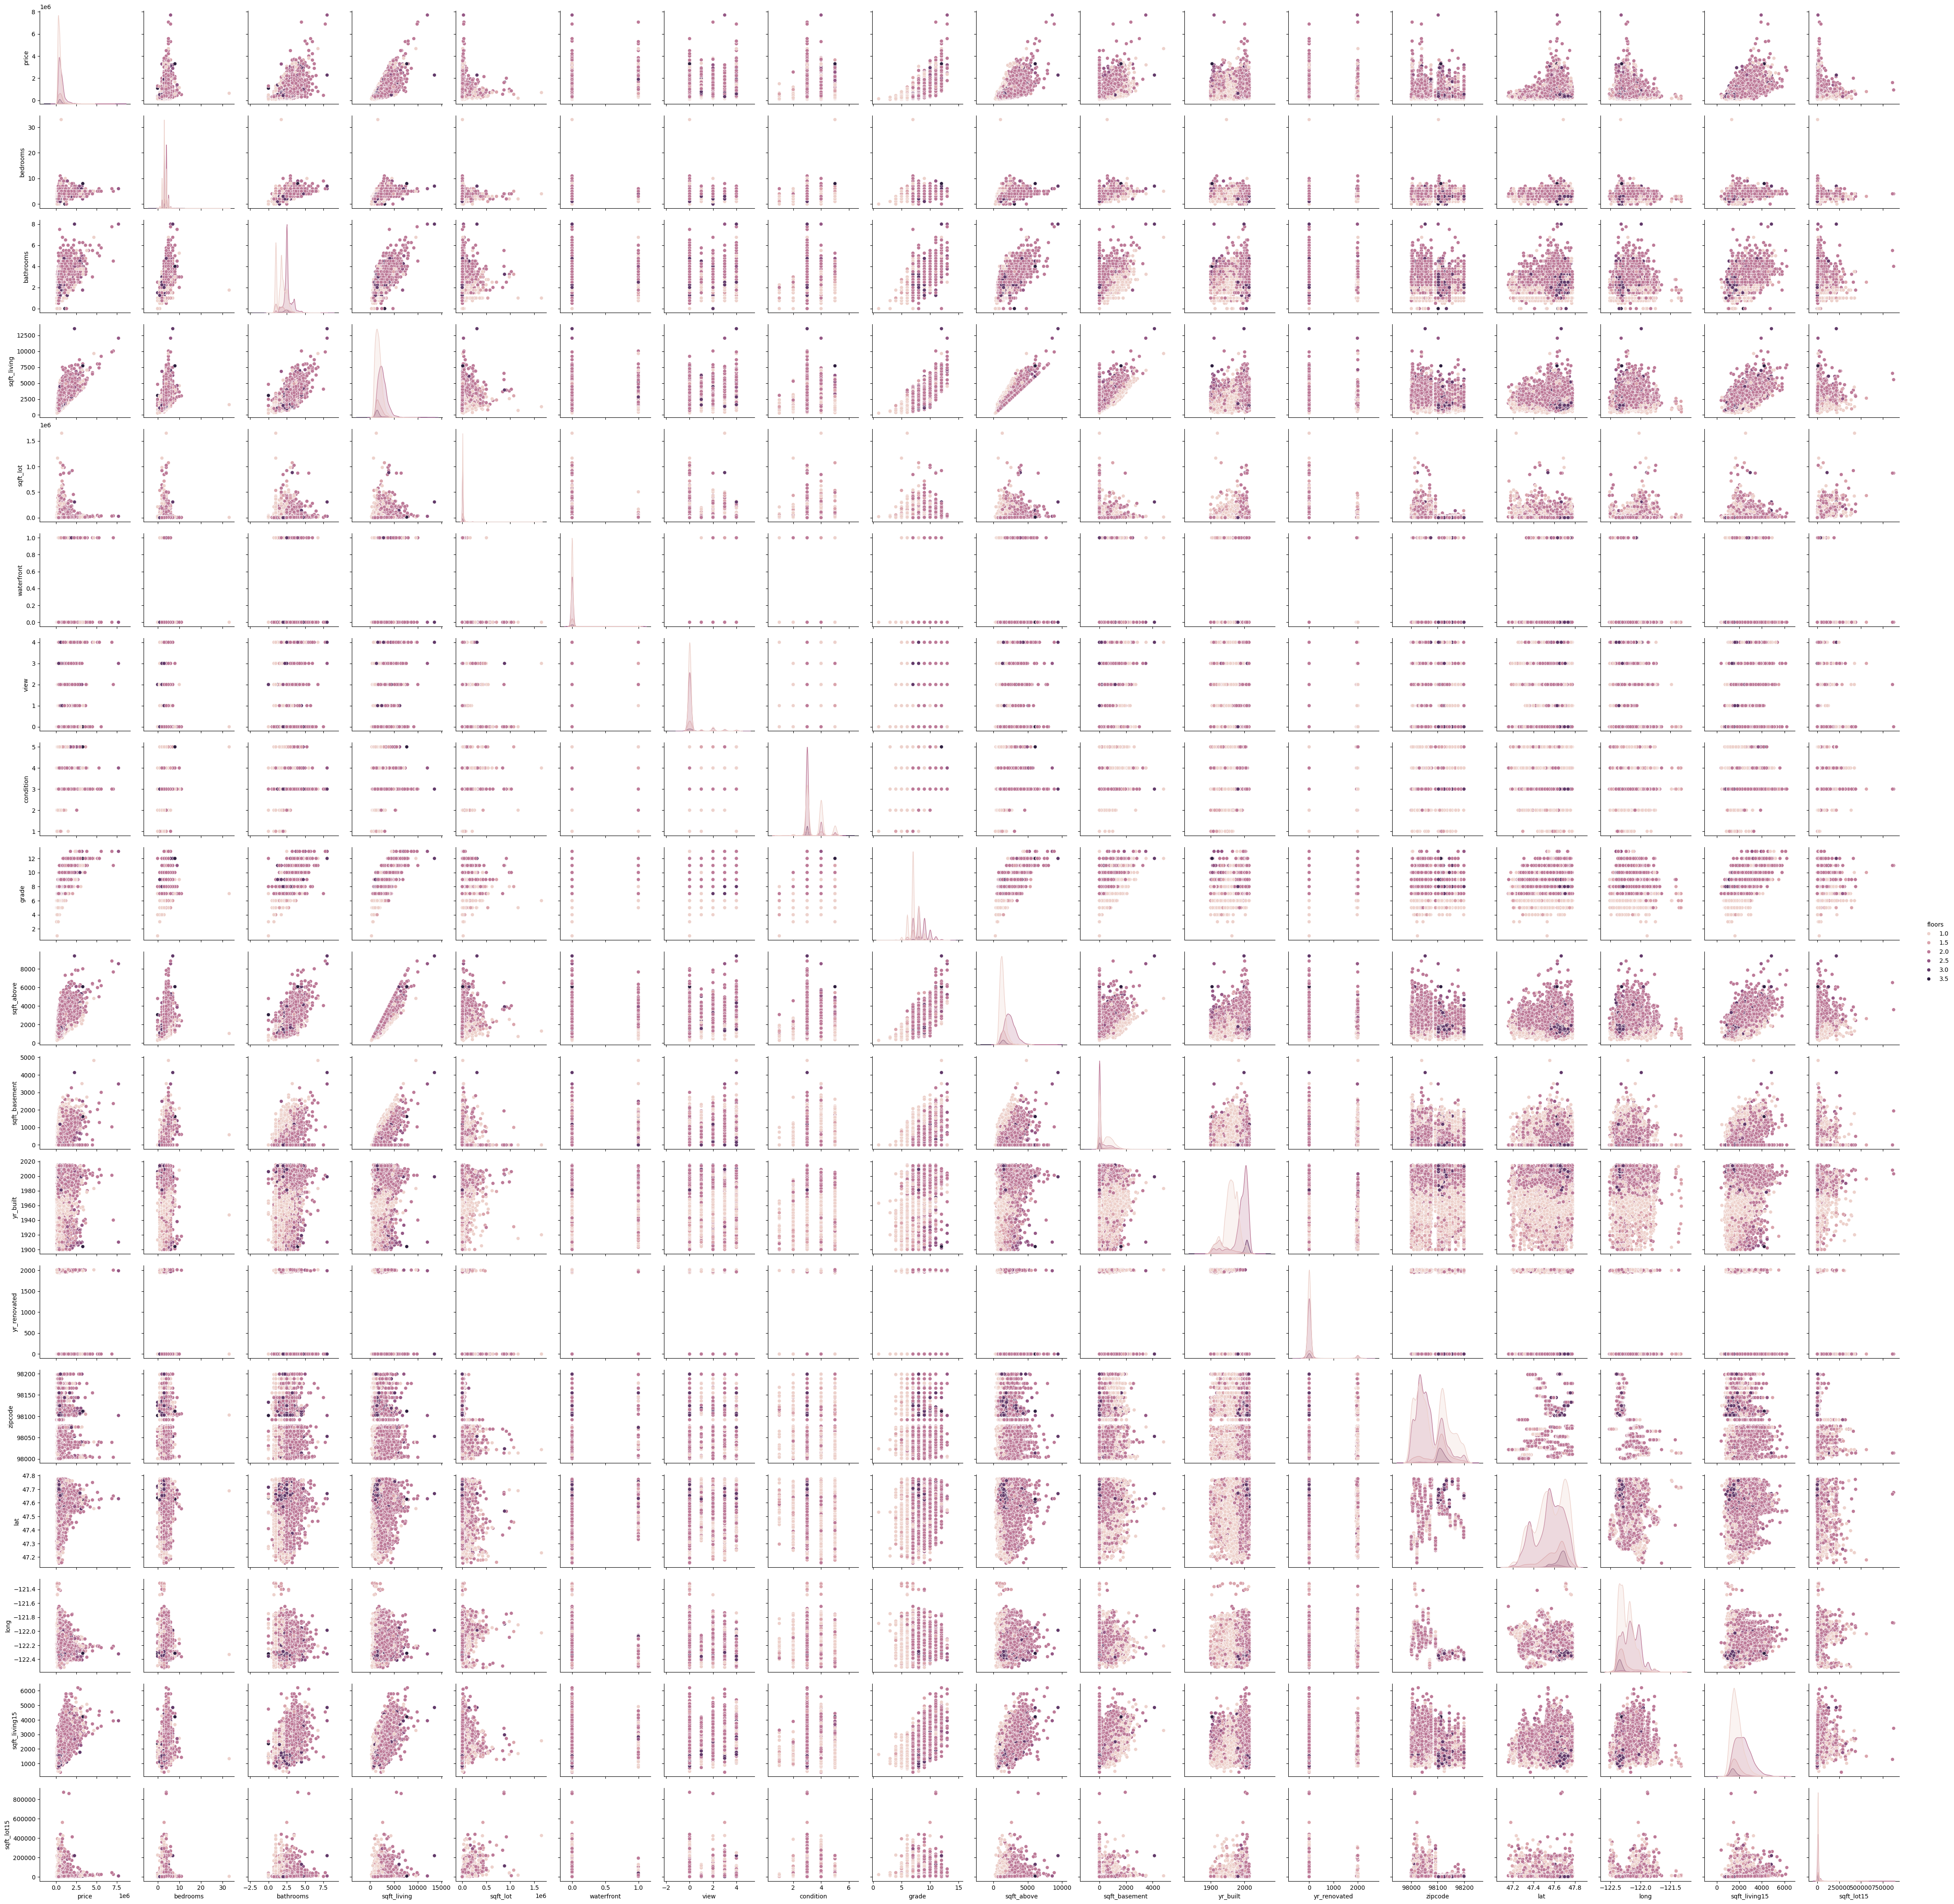

In [16]:
sns_plot = sns.pairplot(df.iloc[:,2:], hue='floors')
sns_plot

C:\Users\psari\AppData\Local\Temp\ipykernel_34860\3774248524.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


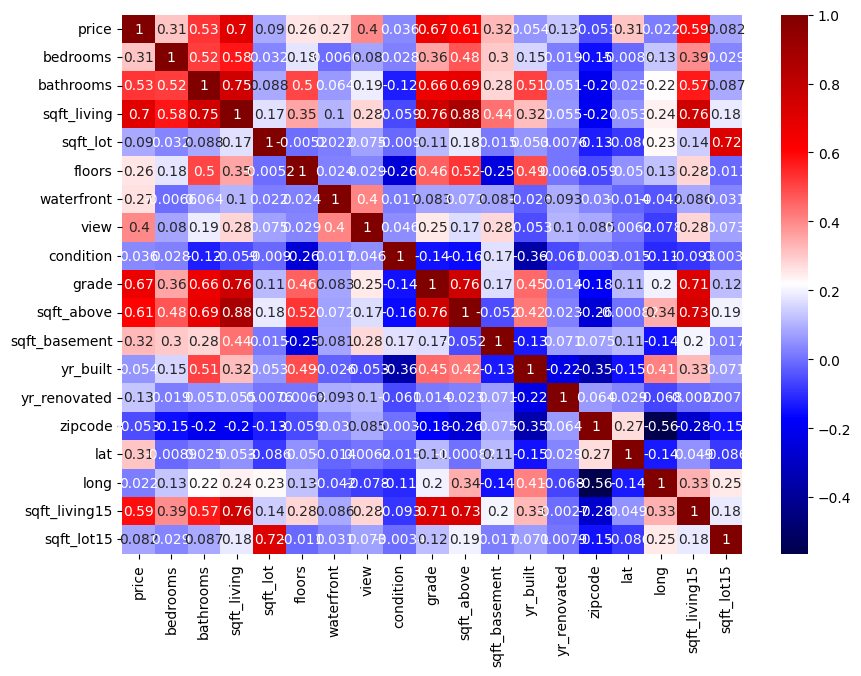

In [17]:
fig = plt.figure(figsize=(10,7))
sns.heatmap(df.iloc[:,2:].corr(),annot = True, cmap = 'seismic')
fig.show()

C:\Users\psari\AppData\Local\Temp\ipykernel_34860\3282191152.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


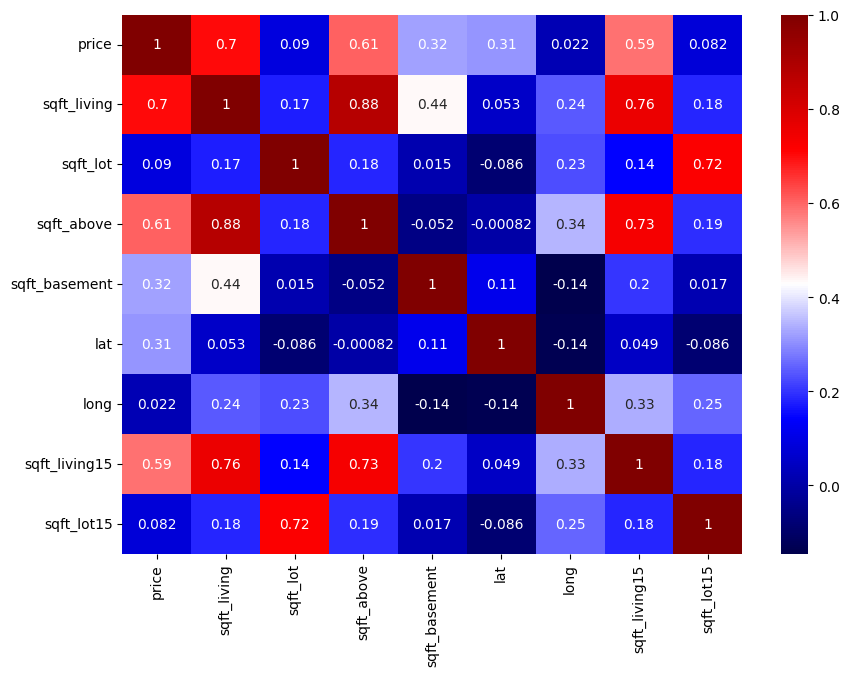

In [21]:
fig = plt.figure(figsize=(10,7))
sns.heatmap(df[variables_numericas].corr(),annot = True, cmap = 'seismic')
fig.show()

C:\Users\psari\AppData\Local\Temp\ipykernel_34860\2556122871.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


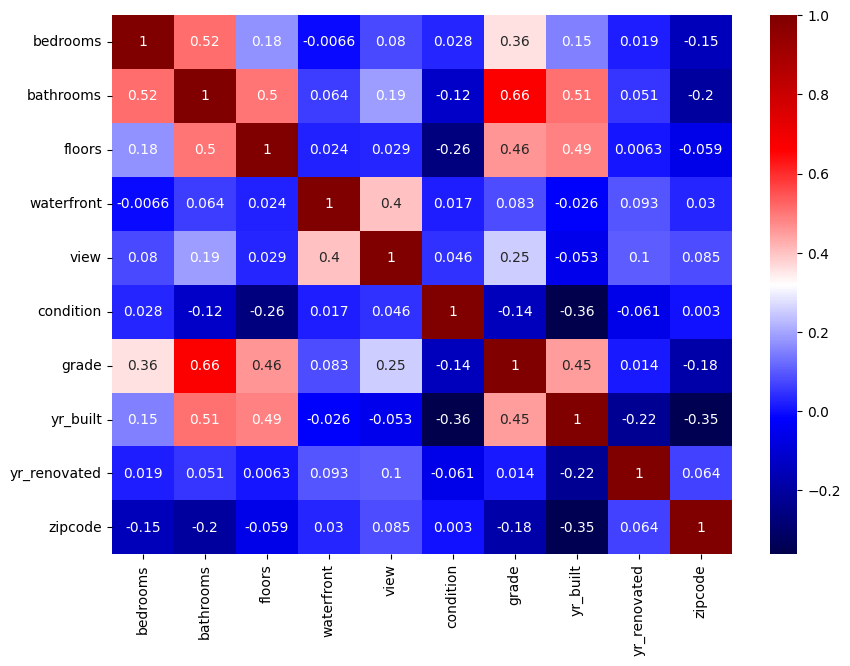

In [26]:
fig = plt.figure(figsize=(10,7))
sns.heatmap(df[variables_categoricas].corr(),annot = True, cmap = 'seismic')
fig.show()

In [28]:
df.corr()['price']

id              -0.016762
date            -0.004357
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

Vemos una correlación positiva fuerte entre las variables sqft_lot15 y sqft_lot al igual que entre sqft_living15 y sqft_living. Esto se puede estar presentando realizando la suposición que sea la misma data pero para el año 2015 (Para esto necesitariamos la metadata del dataset). Tambien vemos otra correlación entre sqft_living y sqft_above, esto se puede dar dado que en muchas ocasiones las casas de dos plantas tienen el mismo espacio habitable tanto arriba como abajo. Esta información es de suma importancia ya que en los modelos de regresión la colinealidad presenta un problema para entrenar este tipo de modelos. 

## Pre-procesamiento

In [4]:
df['date'] = pd.to_datetime(df['date'], yearfirst = True, format = "mixed")

In [5]:
label_encoder = LabelEncoder()
columns_transform = ['yr_built','yr_renovated','zipcode','lat','long']

for columns in df[columns_transform]:
    nombre = 'label_encoder' + columns
    globals()[nombre] = LabelEncoder()
    df[columns] = globals()[nombre].fit_transform(df[columns])

In [6]:
q_low = df['price'].quantile(0.05)
q_high = df['price'].quantile(0.90)
df = df[(df['price'] > q_low) & (df['price'] < q_high)]

In [7]:
X = df.iloc[:,3:].reset_index(drop=True)
y = df.iloc[:,2].reset_index(drop=True)

X.drop(['sqft_lot', 'sqft_living'], axis = 'columns', inplace=True)

In [10]:
scaler = StandardScaler()
columnas_a_estandarizar = ['sqft_above','sqft_living15', 'sqft_lot15']
X[columnas_a_estandarizar] = scaler.fit_transform(X[columnas_a_estandarizar])

1. Para el pre-procesamiento de la data, lo primero que realizamos fue arreglar el formato de fecha ya que esta se encontraba en un formato de string.
2. Se utilizo un LabelEncoder() el cual nos ayuda a cambiar variables categoricas en numericas, variables como: zip_code, lat, long y aunque estas venian como numero permite darles un formato mas standard
3. Eliminación de datos atipicos segun la variable precio
4. Por ultimo, se separa el dataframe en "X" que serán todas nuestras variables predictoras  y "y" que será nuestra variable a predecir la cual es el precio de la vivienda
5. Se elimino las variables 'sqft_lot', 'sqft_living' ya que estas presentan fuerte correlación con las variables "sqft_living15" y "sqft_lot15", las cuales se seleccionaron ya que los datos tenian una distribución mas normal. Recordemos que la correlación en un modelo de regresión es problematico por que son sensibles a la multicolinealidad.

## Selección del modelo

In [12]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

In [13]:
parameters = \
        [ \
            {
                'clf': [LinearRegression()],
                'stand__feature_range': [(0,1)]
            },
            {
                'clf': [RandomForestRegressor()],
                'stand__feature_range': [(0,1)],
                'clf__n_estimators': [50,100],
                'clf__max_depth': [25,50]
            },
            {
                'clf': [GradientBoostingRegressor()],
                'stand__feature_range': [(0,1)],
                'clf__loss': ['squared_error'],
                'clf__learning_rate': [0.001, 0.01, 0.1],
                'clf__n_estimators': [50,100,150,200,300],
                'clf__max_depth': [2,3,4,5,6]
            },
            {
                'clf': [KNeighborsRegressor()],
                'stand__feature_range': [(0,1)],
                'clf__n_neighbors': [5, 10, 15],
                'clf__weights': ['uniform', 'distance']
            },
        ]

In [14]:
result=[]

for params in parameters:
    clf = params['clf'][0]
    params.pop('clf')
    steps = [('stand',MinMaxScaler()),
             ('clf',clf)]
    grid = GridSearchCV(Pipeline(steps), param_grid=params, cv=3)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    result.append\
    (
        {
            'grid': grid,
            'classifier': grid.best_estimator_,
            'best score': grid.best_score_,
            'best params': grid.best_params_,
            'cv': grid.cv,
            'RMSE': rmse
        }
    )

c:\Prueba_tecnica\env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Prueba_tecnica\env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Prueba_tecnica\env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Prueba_tecnica\env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

In [15]:
result = sorted(result, key=operator.itemgetter('best score'),reverse=True)
print(result)

[{'grid': GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('stand', MinMaxScaler()),
                                       ('clf', GradientBoostingRegressor())]),
             param_grid={'clf__learning_rate': [0.001, 0.01, 0.1],
                         'clf__loss': ['squared_error'],
                         'clf__max_depth': [2, 3, 4, 5, 6],
                         'clf__n_estimators': [50, 100, 150, 200, 300],
                         'stand__feature_range': [(0, 1)]}), 'classifier': Pipeline(steps=[('stand', MinMaxScaler()),
                ('clf',
                 GradientBoostingRegressor(max_depth=5, n_estimators=300))]), 'best score': 0.8395297342599929, 'best params': {'clf__learning_rate': 0.1, 'clf__loss': 'squared_error', 'clf__max_depth': 5, 'clf__n_estimators': 300, 'stand__feature_range': (0, 1)}, 'cv': 3, 'RMSE': 66604.86824480025}, {'grid': GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('stand', MinMaxScaler()),
                                

In [ ]:
#saving best classifier
#grid = result[0]['grid']
#joblib.dump(grid, 'classifier.pickle')

In [16]:
grid = result[0]['grid']
grid

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('stand', MinMaxScaler()),
                                       ('clf', GradientBoostingRegressor())]),
             param_grid={'clf__learning_rate': [0.001, 0.01, 0.1],
                         'clf__loss': ['squared_error'],
                         'clf__max_depth': [2, 3, 4, 5, 6],
                         'clf__n_estimators': [50, 100, 150, 200, 300],
                         'stand__feature_range': [(0, 1)]})

In [17]:
best_model = grid.best_estimator_

y_pred = best_model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error on Test Data: {mse}")

r2 = r2_score(y_val, y_pred)
print(f"R^2 Score on Test Data: {r2}")

Mean Squared Error on Test Data: 4423270858.311866
R^2 Score on Test Data: 0.8478123552729077


In [18]:
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R^2 Score on Test Data: {r2}")

Mean Squared Error on Test Data: 4436208473.907202
R^2 Score on Test Data: 0.8478433103791125


In [19]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test, y_pred)

66604.86824480025

## Red Neuronal Multicapa

In [29]:
X = df.iloc[:,3:]
y = df.iloc[:,2]

X.drop(['sqft_lot', 'sqft_living'], axis = 'columns', inplace=True)

In [30]:
x_nn = X.values
y_nn = y.values
scaler = StandardScaler()
x_nn = scaler.fit_transform(x_nn)

X_train, X_test, y_train, y_test = train_test_split(x_nn, y_nn, test_size=0.2, random_state=42)


X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


class NeuralNet(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x


model = NeuralNet(input_size=X_train.shape[1])
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 1000
for epoch in range(num_epochs):
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

with torch.no_grad():
    model.eval()
    predicted = model(X_test)
    test_loss = criterion(predicted, y_test)
    print(f'Test Loss: {test_loss.item():.4f}')

    mse = mean_squared_error(y_test.numpy(), predicted.numpy())
    rmse = np.sqrt(mse)
    print(f'MSE: {mse:.4f}')
    print(f'RMSE: {rmse:.4f}')

c:\Prueba_tecnica\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch [100/1000], Loss: 246920036352.0000
Epoch [200/1000], Loss: 246228631552.0000
Epoch [300/1000], Loss: 243990298624.0000
Epoch [400/1000], Loss: 239291023360.0000
Epoch [500/1000], Loss: 231544078336.0000
Epoch [600/1000], Loss: 220234268672.0000
Epoch [700/1000], Loss: 205660471296.0000
Epoch [800/1000], Loss: 188171616256.0000
Epoch [900/1000], Loss: 168700985344.0000
Epoch [1000/1000], Loss: 148808400896.0000
Test Loss: 148176732160.0000
MSE: 148176732160.0000
RMSE: 384937.3125


## Conclusión

Se presentaron dos metodologías una con modelos de machine learning y otra con modelo de deep learning:

**Machine learning:**

Para el proceso de evaluación de cada uno de los siguientes modelos se ingresaron dentro de un Grid Search, el cual realizaba CrossValidation.

1. GradientBoostingRegressor(max_depth=6, n_estimators=300), 'best score': 0.8399
2. RandomForestRegressor(max_depth=25), 'best score': 0.8247
3. KNeighborsRegressor(n_neighbors=10, weights='distance'), 'best score': 0.7564896605019001
4. LinearRegression(), 'best score': 0.6407

Con estos resultados dentro de esta metodología se selecciona el GradientBoostingRegressor (recordemos que es un modelo que se 
apalanca de un modelo debil como los arboles de decisión, luego aplica un descenso del gradiente con ayuda de una tasa de aprendizaje 
y luego la suma de todas las predicciones individuales), el cual la ser evaluado contra el dataset de prueba 
nos dio un RMSE de 66847.8 y un R2:  0.84, es decir un 84% de la variabilidad de mis datos es explicada por el modelo. 

**Deep Learning**

1. Red Neuronal Multicapa (3 capas totalmente conectadas y una de DropOut), RMSE: 384937.3



##### Por lo que la decisión final es tomar el modelo de **GradientBoostingRegressor.**

## Caso de uso:

Tenemos la siguiente casa con las siguientes caracteristicas que se ven abajo:

In [20]:
print(X.loc[[56]])
print(y.loc[[56]])

    bedrooms  bathrooms  floors  waterfront  view  condition  grade  \
56         3       2.25     1.0           0     0          3      7   

    sqft_above  sqft_basement  yr_built  yr_renovated  zipcode   lat  long  \
56   -0.853957            550        79             0       54  3387   183   

    sqft_living15  sqft_lot15  
56      -0.825315   -0.317395  
56    425000
Name: price, dtype: int64


In [29]:
intento= X.loc[[56]]
intento

bedrooms  bathrooms  floors  waterfront  view  condition  grade  \
56         3       2.25     1.0           0     0          3      7   

    sqft_above  sqft_basement  yr_built  yr_renovated  zipcode   lat  long  \
56   -0.853957            550        79             0       54  3387   183   

    sqft_living15  sqft_lot15  
56      -0.825315   -0.317395

In [30]:
best_model = grid.best_estimator_

y_pred = best_model.predict(intento)

In [31]:
y_pred

array([467344.63827829])

Digamos que con esta información de esta vivienda como se presenta aquí, podría buscar ofertas de viviendas dentro de la misma ubicación  y con la cantidad de pies cuadrados habitables parecidos. Eso si variandole a otras variables como cantidad de piezas y baños. Asi poder luego hacer remodelación interna de la casa mejorando estas otras variables y reajustando los datos de mi vivienda poder venderla a un precio mayor